In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
df = pd.read_csv('llt.csv') 

# Counts of students wrt different sessions and different subjects

In [76]:
students_count_subject = df['subject'].value_counts()
subjects = students_count_subject.keys().to_numpy()
students_count_subject.describe()

count     9.000000
mean     44.111111
std      19.782849
min      24.000000
25%      30.000000
50%      34.000000
75%      52.000000
max      79.000000
Name: count, dtype: float64

In [78]:
sessions = df['session'].value_counts().keys()
df['session'].value_counts()

session
2020-2021    93
2022-2023    91
2021-2022    87
2019-2020    72
2018-2019    48
2017-2018     5
2023-2024     1
Name: count, dtype: int64

# Preparing Dataset for Heatmap

In [5]:
data = dict()
for key in sessions:
    data[key] = np.zeros(len(subjects))



for i in range(len(subjects)):
    subject_student = df[df['subject']==subjects[i]]
    for j in sessions:
        value = len(subject_student[subject_student['session']==j])
        data[j][i] += value
new_data = pd.DataFrame(data)
dataset = new_data.set_index(subjects)
dataset

,2020-2021,2022-2023,2021-2022,2019-2020,2018-2019,2017-2018,2023-2024
PHYS,18.0,21.0,9.0,17.0,12.0,2.0,0.0
STAT,16.0,18.0,15.0,13.0,7.0,0.0,1.0
CHEM,10.0,19.0,8.0,11.0,4.0,0.0,0.0
LAW,15.0,6.0,22.0,6.0,0.0,0.0,0.0
ACHEM,7.0,7.0,11.0,8.0,1.0,0.0,0.0
IMS,10.0,0.0,7.0,5.0,11.0,0.0,0.0
FISH,4.0,4.0,6.0,7.0,7.0,2.0,0.0
OCNGR,10.0,1.0,4.0,4.0,6.0,1.0,0.0
MATH,3.0,15.0,5.0,1.0,0.0,0.0,0.0


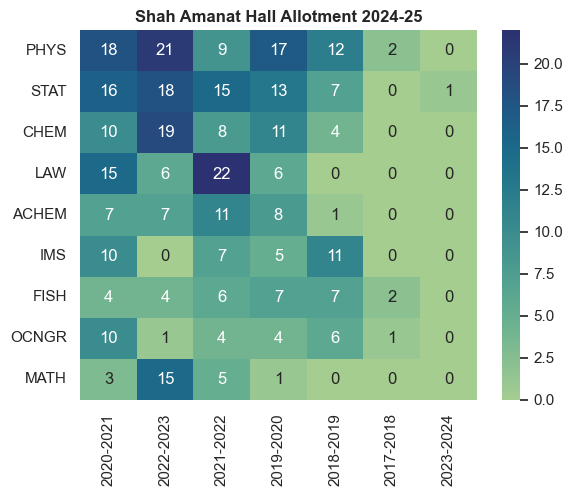

In [6]:
sns.heatmap(dataset, annot=True,cmap="crest")
plt.title('Shah Amanat Hall Allotment 2024-25',weight='bold')
plt.savefig('samnt_heatmap.png')
plt.show()

# Piechart

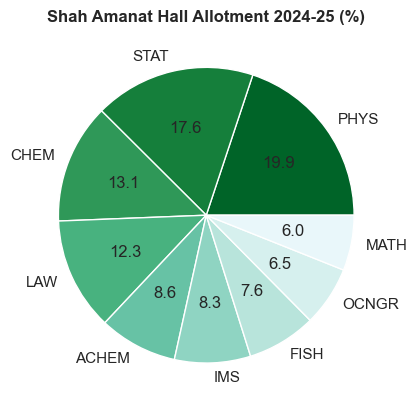

In [48]:
total_student = sum(students_count_subject.to_numpy())
students = students_count_subject.to_numpy()/total_student*100
plt.pie(
    x = students,
    labels = subjects,
    autopct= '%.1f',
    colors=sns.color_palette("BuGn_r", len(subjects))
)
plt.title('Shah Amanat Hall Allotment 2024-25 (%)',weight='bold')
plt.savefig('samnt_piechart.png')
plt.show()

# Boxplot

In [8]:
cgpa_student = df[df['score']<=4.00]
cgpa_student

,sl,roll,name,session,subject,year,score
99,100,22903022,MD. NAHIAN ISLAM,2021-2022,FISH,2,3.82
100,101,22209014,MD. RAKIB HASSAN RONY,2021-2022,ACHEM,2,3.80
101,102,22209003,EKRAMUL HAQUE SHAKIB,2021-2022,ACHEM,2,3.79
102,103,22901036,MD. MARUF HOSSAIN,2021-2022,IMS,2,3.77
103,104,22901044,MD. APON SORKAR,2021-2022,IMS,2,3.74
...,...,...,...,...,...,...,...
392,393,20202148,MD. AL AMIN,2019-2020,CHEM,4,3.32
393,394,20201134,RUBEL HASAN,2019-2020,PHYS,4,3.32
394,395,20202141,SABBIR AHMED,2019-2020,CHEM,4,3.31
395,396,20201127,MOHAMMAD ROMIJ ALI,2019-2020,PHYS,4,3.30


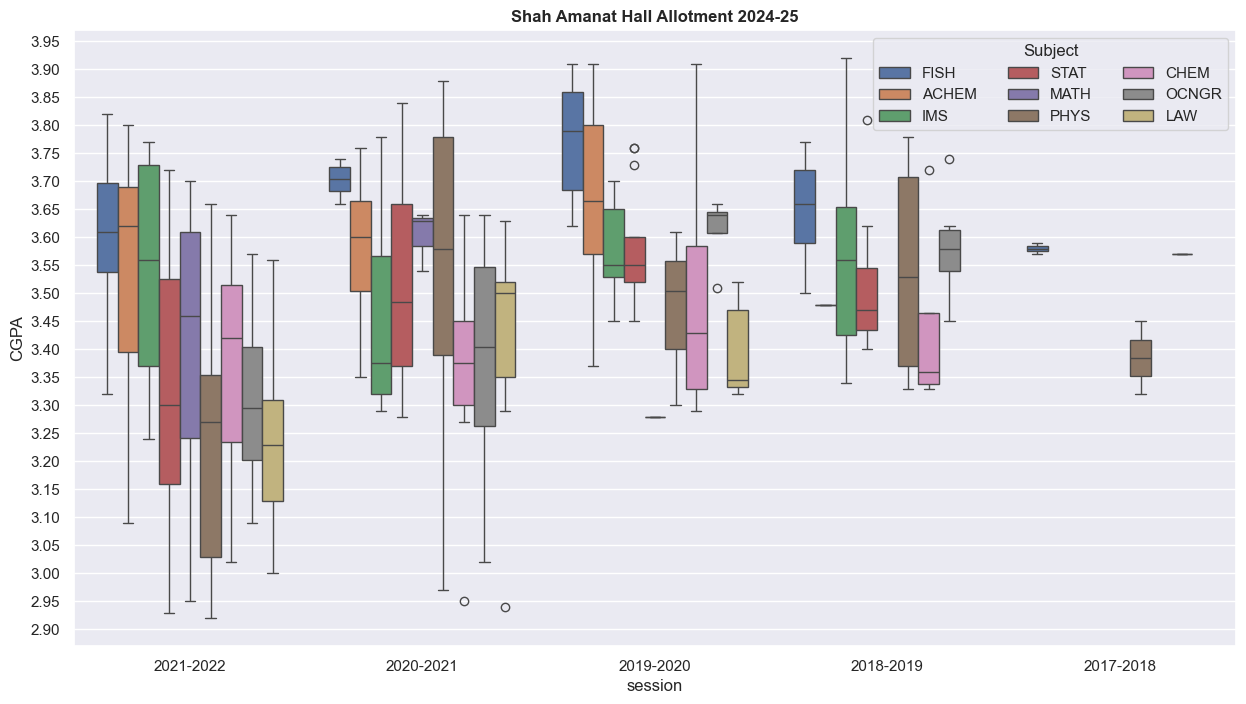

In [13]:


plt.figure(figsize=(15, 8))
sns.boxplot(x='session', y='score', hue='subject', data=cgpa_student)
plt.title('Shah Amanat Hall Allotment 2024-25',weight='bold')
plt.ylabel('CGPA')
plt.yticks(np.arange(2.9, 4, step=0.05))
plt.legend(title='Subject',ncols=3)
plt.savefig('samnt_boxplot.png')
plt.show()

In [19]:
df[df['score']>4.00]

,sl,roll,name,session,subject,year,score
0,1,23204009,MD. ARIFUL ISLAM,2022-2023,STAT,1,5.0
1,2,23209021,MD. KABIRUZZAMAN,2022-2023,ACHEM,1,5.0
2,3,23209016,ANIRUDDHA SAHA,2022-2023,ACHEM,1,5.0
3,4,23209015,MOHAMMOD MOHSIN MUGDHO,2022-2023,ACHEM,1,5.0
4,5,23209006,ARAFATUL ISLAM,2022-2023,ACHEM,1,5.0
...,...,...,...,...,...,...,...
94,95,23202047,MD TARIQUL ISLAM,2022-2023,CHEM,1,5.0
95,96,23903001,S. M. SHORIFUL ISLAM,2022-2023,FISH,1,5.0
96,97,23903016,RAKIB HASAN,2022-2023,FISH,1,5.0
97,98,23903003,MD. ATIK SHAHRIYAR FOYSAL,2022-2023,FISH,1,5.0


# Continuous Probability Density 

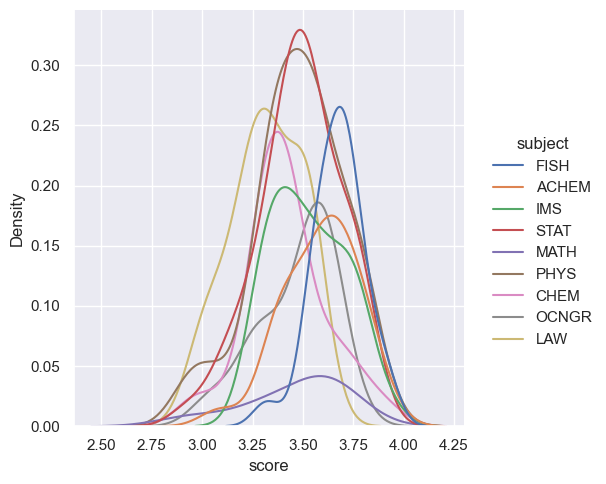

In [12]:

cgpa_dataset = df[df['score']<=4.00]
sns.displot(cgpa_dataset, x="score", hue='subject', kind="kde")
plt.savefig('samnt_kde.png')
plt.show()

# Piechart of Freshers

In [71]:
stu_only_gpa = df[df['score']>4.00]
gpa_students = stu_only_gpa['subject'].value_counts()
gpa_students_subjects = gpa_students.keys().to_numpy()
gpa_student_counts = gpa_students.to_numpy()
len(stu_only_cg)

298

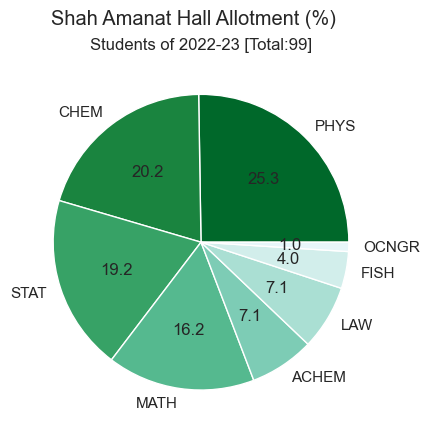

In [67]:
percentage = gpa_student_counts/ sum(gpa_student_counts) *100
plt.pie(
    x = percentage,
    labels = gpa_students_subjects,
    autopct= '%.1f',
    colors=sns.color_palette("BuGn_r", len(gpa_students_subjects))
)
plt.suptitle('Shah Amanat Hall Allotment (%)')
plt.title(f'Students of 2022-23 [Total:{len(stu_only_gpa)}]')
plt.savefig('samnt_piechart_freshers.png')
plt.show()

,2020-2021,2022-2023,2021-2022,2019-2020,2018-2019,2017-2018,2023-2024
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,10.333333,10.111111,9.666667,8.000000,5.333333,0.555556,0.111111
std,5.220153,8.161563,5.700877,4.924429,4.472136,0.881917,0.333333
min,3.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000
25%,7.000000,4.000000,6.000000,5.000000,1.000000,0.000000,0.000000
50%,10.000000,7.000000,8.000000,7.000000,6.000000,0.000000,0.000000
75%,15.000000,18.000000,11.000000,11.000000,7.000000,1.000000,0.000000
max,18.000000,21.000000,22.000000,17.000000,12.000000,2.000000,1.000000
